In [309]:
import math
from statistics import mean

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

raw_set_data = pd.read_csv("X023_set_export.csv")
# let's have a quick peek at the dataframe 
columns_of_interest = [
    "set_number", "start_date", "end_date", 'start_latitude_DD',
    'start_latitude_MMmm', 'start_longitude_DD', 'start_longitude_MMmm', 'end_latitude_DD',
    'end_latitude_MMmm', 'end_longitude_DD', 'end_longitude_MMmm', "set_result", "id"
]
raw_set_data[columns_of_interest].head()

,set_number,start_date,end_date,start_latitude_DD,start_latitude_MMmm,start_longitude_DD,start_longitude_MMmm,end_latitude_DD,end_latitude_MMmm,end_longitude_DD,end_longitude_MMmm,set_result,id
0,1,2023-06-20 14:48:42 UTC,2023-06-21 09:23:20 UTC,46,NaN,-64,NaN,46.0,NaN,-64.0,NaN,1 - NORMAL - No damage to gear,344
1,2,2023-06-20 14:55:00 UTC,2023-06-21 09:41:42 UTC,46,NaN,-64,NaN,46.0,NaN,-64.0,NaN,1 - NORMAL - No damage to gear,345
2,3,2023-06-20 15:00:54 UTC,2023-06-21 09:51:54 UTC,46,49.39991,-64,18.45374,46.0,49.40960,-64.0,18.40501,1 - NORMAL - No damage to gear,346
3,4,2023-06-20 15:08:17 UTC,2023-06-21 10:00:29 UTC,46,NaN,-64,NaN,46.0,NaN,-64.0,NaN,1 - NORMAL - No damage to gear,347
4,5,2023-06-20 15:14:13 UTC,2023-06-21 10:11:03 UTC,46,46.83280,-64,22.06068,46.0,46.85389,-64.0,22.02738,1 - NORMAL - No damage to gear,348


### Let's do a bit of cleanup to the Set data

In [321]:
def dm2dd(d, m, longitude=False):
    """function to convert degree minutes to decimal degrees"""
    if d < 0:
        d = -d
    if m < 0:
        m = -m
    my_coord = float(d) + float(m) / 60
    return -my_coord if longitude else my_coord


# convert DDMM to dec deg
raw_set_data["start_latitude"] = raw_set_data.apply(lambda x: dm2dd(x["start_latitude_DD"], x["start_latitude_MMmm"], False), axis=1)
raw_set_data["start_longitude"] = raw_set_data.apply(lambda x: dm2dd(x["start_longitude_DD"], x["start_longitude_MMmm"], True), axis=1)
raw_set_data["end_latitude"] = raw_set_data.apply(lambda x: dm2dd(x["end_latitude_DD"], x["end_latitude_MMmm"], False), axis=1)
raw_set_data["end_longitude"] = raw_set_data.apply(lambda x: dm2dd(x["end_longitude_DD"], x["end_longitude_MMmm"], True), axis=1)

# centroids
raw_set_data["centroid_latitude"] = raw_set_data.apply(lambda x: mean([x["start_latitude"], x["end_latitude"]]), axis=1)
raw_set_data["centroid_longitude"] = raw_set_data.apply(lambda x: mean([x["start_longitude"], x["end_longitude"]]), axis=1)



# datetime string to datetime objects
raw_set_data["start_date"] = pd.to_datetime(raw_set_data["start_date"])
raw_set_data["end_date"] = pd.to_datetime(raw_set_data["end_date"])


# add some columns to help identify problematic sets
def is_valid(*args) -> bool:
    for item in args:
        if not bool(item) or np.isnan(item):
            return False
    return True


raw_set_data["has_start_coordinates"] = raw_set_data.apply(lambda x: is_valid(x["start_latitude"], x["start_longitude"]), axis=1)
raw_set_data["has_end_coordinates"] = raw_set_data.apply(lambda x: is_valid(x["end_latitude"], x["end_longitude"]), axis=1)

columns_of_interest = ["set_number", "start_date", "end_date", 'start_latitude', 'start_longitude', 'end_latitude', 'end_longitude', 'centroid_latitude', 'centroid_longitude', 'id',
                       "has_start_coordinates", "has_end_coordinates"]
sets = raw_set_data[columns_of_interest]
# sets.to_csv("sets.csv")
sets

,set_number,start_date,end_date,start_latitude,start_longitude,end_latitude,end_longitude,centroid_latitude,centroid_longitude,id,has_start_coordinates,has_end_coordinates
0,1,2023-06-20 14:48:42+00:00,2023-06-21 09:23:20+00:00,NaN,NaN,NaN,NaN,NaN,NaN,344,False,False
1,2,2023-06-20 14:55:00+00:00,2023-06-21 09:41:42+00:00,NaN,NaN,NaN,NaN,NaN,NaN,345,False,False
2,3,2023-06-20 15:00:54+00:00,2023-06-21 09:51:54+00:00,46.823332,-64.307562,46.823493,-64.306750,46.823413,-64.307156,346,True,True
3,4,2023-06-20 15:08:17+00:00,2023-06-21 10:00:29+00:00,NaN,NaN,NaN,NaN,NaN,NaN,347,False,False
4,5,2023-06-20 15:14:13+00:00,2023-06-21 10:11:03+00:00,46.780547,-64.367678,46.780898,-64.367123,46.780722,-64.367401,348,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
839,840,2023-08-03 18:42:21+00:00,2023-08-04 16:22:02+00:00,47.986985,-65.849799,47.987216,-65.849069,47.987101,-65.849434,1194,True,True
840,841,2023-08-03 18:59:04+00:00,2023-08-04 16:38:45+00:00,48.008850,-65.822309,48.007776,-65.820893,48.008313,-65.821601,1195,True,True
841,842,2023-08-03 19:09:51+00:00,2023-08-04 16:46:45+00:00,47.987321,-65.787154,47.987620,-65.786459,47.987470,-65.786806,1196,True,True
842,843,2023-08-03 19:18:56+00:00,2023-08-04 16:57:09+00:00,47.967994,-65.753419,47.968229,-65.752661,47.968111,-65.753040,1198,True,True


In [322]:
# Let's find sets with missing coordinates
print("missing both:", sets[((sets["has_start_coordinates"] == False) & (sets["has_end_coordinates"] == False))]["set_number"].to_list())  # missing both
print("missing start:", sets[((sets["has_start_coordinates"] == False) & (sets["has_end_coordinates"] == True))]["set_number"].to_list())  # missing start
print("missing end:", sets[((sets["has_start_coordinates"] == True) & (sets["has_end_coordinates"] == False))]["set_number"].to_list())  # missing end


missing both: [1, 2, 4]
missing start: [91, 453, 802]
missing end: [51, 133, 257, 269, 278, 335, 640, 731]




| Set number | Missing Start Coordinate | Missing End Coordinate |
|------------|--------------------------|------------------------|
| 1          | Yes                      | Yes                    |
| 2          | Yes                      | Yes                    |
| 4          | Yes                      | Yes                    |
| 91         | Yes                      |                      |
| 453        | Yes                      |                      |
| 802        | Yes                      |                      |
|    51     |                        | Yes                    |
|    133     |                       | Yes                    |
|    257     |                        | Yes                    |
|    269     |                        | Yes                    |
|    278     |                        | Yes                    |
|    335     |                        | Yes                    |
|    640     |                        | Yes                    |
|    731     |                        | Yes                    |


### We will have to deal with the above coordinates separately. For now, we exclude them from the analysis


In [323]:
mask = ((sets["has_start_coordinates"] == True) & (sets["has_end_coordinates"] == True))
full_sets = sets[mask].copy(deep=True)
print(full_sets.shape)

(830, 12)


### The resulting dataframe is 830 observations

Now let's have a quick look at the distances between start end end coordinates and we'll see if we can spot some outliers


In [324]:
# it would be interesting to look at the set distances
def calc_nautical_dist(p0, p1):
    """
    p0 and p1 should be dicts with key 'lat' and 'lng'
    """
    try:
        nautical_miles = 3443.8985 * math.acos(
            math.sin(p0["lat"] * math.pi / 180) * math.sin(p1["lat"] * math.pi / 180) +
            math.cos(p0["lat"] * math.pi / 180) * math.cos(p1["lat"] * math.pi / 180) *
            math.cos(p1["lng"] * math.pi / 180 - p0["lng"] * math.pi / 180)
        )
        return nautical_miles
    except:
        pass


full_sets["distance"] = sets.apply(
    lambda x: calc_nautical_dist({"lat": x["start_latitude"], "lng": x["start_longitude"]}, {"lat": x["end_latitude"], "lng": x["end_longitude"]}), axis=1)



(-100.0, 850.0)

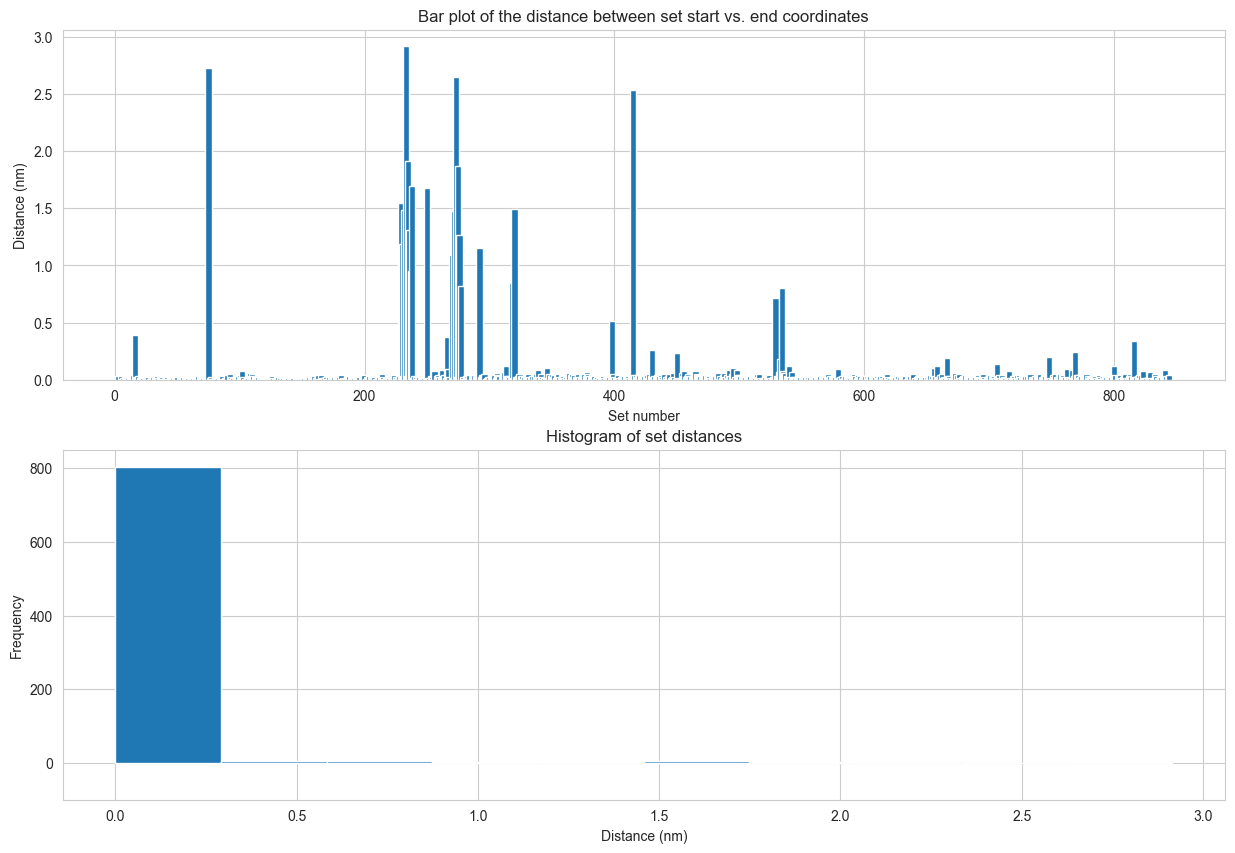

In [325]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 1, 1)
plt.bar(full_sets["set_number"], full_sets["distance"], width=5)
plt.title("Bar plot of the distance between set start vs. end coordinates")
plt.xlabel("Set number")
plt.ylabel("Distance (nm)")

plt.subplot(2, 1, 2)
hist = plt.hist(full_sets["distance"])
plt.title("Histogram of set distances")
plt.xlabel("Distance (nm)")
plt.ylabel("Frequency")
plt.ylim(-100, 850)


In [326]:
print(hist[0])
print(hist[1])


[804.   4.   4.   3.   3.   6.   2.   0.   1.   3.]
[0.         0.29150267 0.58300534 0.87450801 1.16601069 1.45751336
 1.74901603 2.0405187  2.33202137 2.62352404 2.91502671]


In the above, we can the vast majority of set distances range between 0-0.29 nm,  exclusively.

Let's take a closer look at the sets whose distances are greater than 0.2 nm  

In [327]:
# let's get a list of sets whose distances are greater than 10

mask = full_sets["distance"] > 0.2
sus_sets = full_sets[mask]

print(sus_sets.shape)
sus_sets

(29, 13)


,set_number,start_date,end_date,start_latitude,start_longitude,end_latitude,end_longitude,centroid_latitude,centroid_longitude,id,has_start_coordinates,has_end_coordinates,distance
15,16,2023-06-20 16:28:05+00:00,2023-06-21 11:48:09+00:00,46.846854,-64.391517,46.842294,-64.398450,46.844574,-64.394983,359,True,True,0.395430
74,75,2023-06-22 09:34:20+00:00,2023-06-23 09:22:50+00:00,46.834092,-64.292130,46.866251,-64.245466,46.850172,-64.268798,422,True,True,2.723280
228,229,2023-07-10 13:27:05+00:00,2023-07-11 08:40:36+00:00,45.926367,-62.769499,45.927975,-62.732589,45.927171,-62.751044,581,True,True,1.546195
229,230,2023-07-10 13:38:21+00:00,2023-07-11 08:55:46+00:00,45.928087,-62.731852,45.910066,-62.743572,45.919076,-62.737712,582,True,True,1.188903
231,232,2023-07-10 14:15:44+00:00,2023-07-11 09:31:23+00:00,45.877556,-62.679575,45.885883,-62.712869,45.881719,-62.696222,584,True,True,1.480335
232,233,2023-07-10 14:30:13+00:00,2023-07-11 09:45:53+00:00,45.829740,-62.678926,45.878236,-62.679372,45.853988,-62.679149,585,True,True,2.915027
234,235,2023-07-10 14:53:58+00:00,2023-07-11 10:16:08+00:00,45.826959,-62.723614,45.829953,-62.678245,45.828456,-62.700929,587,True,True,1.908689
235,236,2023-07-10 15:06:23+00:00,2023-07-11 10:30:00+00:00,45.805389,-62.723997,45.827159,-62.723749,45.816274,-62.723873,588,True,True,1.308579
236,237,2023-07-10 15:11:57+00:00,2023-07-11 10:40:09+00:00,45.796001,-62.741466,45.805658,-62.723397,45.800830,-62.732432,589,True,True,0.954049
237,238,2023-07-10 15:23:17+00:00,2023-07-11 10:49:39+00:00,45.771854,-62.720329,45.796203,-62.740803,45.784029,-62.730566,590,True,True,1.696621


## There are 29 sets identified worth inspecting

In [317]:






# now we need to reshape the dataframe.. each row should be a start or stop datetime/coordinate
df_dict = {
    "set_number": [],
    "type": [],
    "datetime": [],
    "lat": [],
    "lng": [],
    "dist": [],
}

for index, row in sus_sets.iterrows():
    # two entries for each row
    df_dict["set_number"].append(row["set_number"])
    df_dict["type"].append("start")
    df_dict["datetime"].append(row["start_date"])
    df_dict["lat"].append(row["start_latitude"])
    df_dict["lng"].append(row["start_longitude"])
    df_dict["dist"].append(row["distance"])
    df_dict["set_number"].append(row["set_number"])
    df_dict["type"].append("end")
    df_dict["datetime"].append(row["end_date"])
    df_dict["lat"].append(row["end_latitude"])
    df_dict["lng"].append(row["end_longitude"])
    df_dict["dist"].append(row["distance"])

locs = pd.DataFrame(df_dict)
locs

,set_number,type,datetime,lat,lng,dist
0,16,start,2023-06-20 16:28:05+00:00,46.846854,-64.391517,0.395430
1,16,end,2023-06-21 11:48:09+00:00,46.842294,-64.398450,0.395430
2,75,start,2023-06-22 09:34:20+00:00,46.834092,-64.292130,2.723280
3,75,end,2023-06-23 09:22:50+00:00,46.866251,-64.245466,2.723280
4,229,start,2023-07-10 13:27:05+00:00,45.926367,-62.769499,1.546195
5,229,end,2023-07-11 08:40:36+00:00,45.927975,-62.732589,1.546195
6,230,start,2023-07-10 13:38:21+00:00,45.928087,-62.731852,1.188903
7,230,end,2023-07-11 08:55:46+00:00,45.910066,-62.743572,1.188903
8,232,start,2023-07-10 14:15:44+00:00,45.877556,-62.679575,1.480335
9,232,end,2023-07-11 09:31:23+00:00,45.885883,-62.712869,1.480335


<Axes: xlabel='lng', ylabel='lat'>

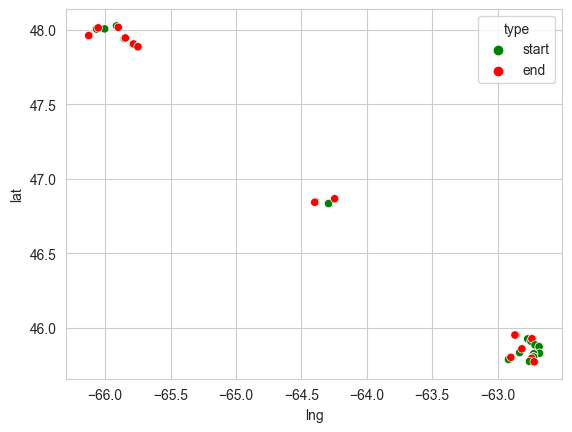

In [318]:
sns.scatterplot(data=locs, x="lng", y="lat", hue="type", palette=["g", "r"])

There are three groups of sets. Let's look at each one more carefully

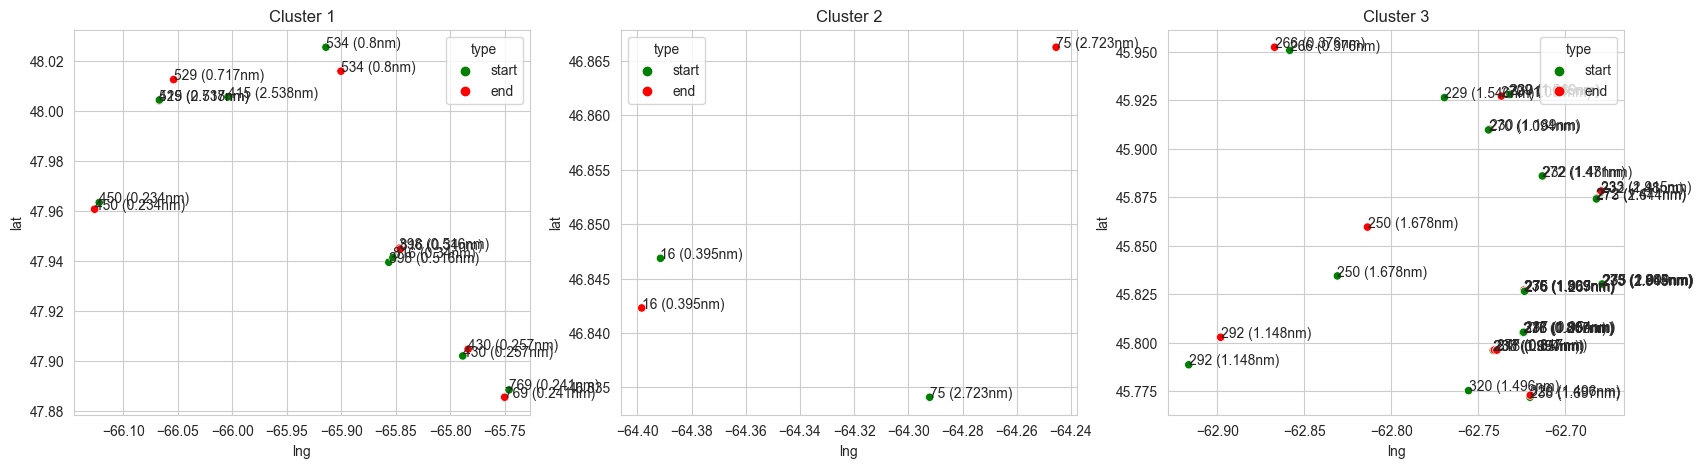

In [319]:
# carve out the points based on y axis
g1_y_range = (47, 50)
g2_y_range = (46.5, 47)
g3_y_range = (0, 46.5)
y_ranges = [g1_y_range,g2_y_range,g3_y_range]

fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(20, 5),)
for y_range in y_ranges:
    index = y_ranges.index(y_range)
    ax = axes[index]
    mask = ((locs["lat"] > min(y_range)) & (locs["lat"] < max(y_range)))
    sub_df = locs[mask]
    sns.scatterplot(data=sub_df, x="lng", y="lat", hue="type", palette=["g", "r"], markers="o", ax=ax)
    ax.set_title(f"Cluster {index+1}")
    for index, row in sub_df.iterrows():
        ax.text(x=row["lng"], y=row["lat"],  s=f'{row["set_number"]} ({round(row["dist"],3)}nm)')
    


<Axes: xlabel='lng', ylabel='lat'>

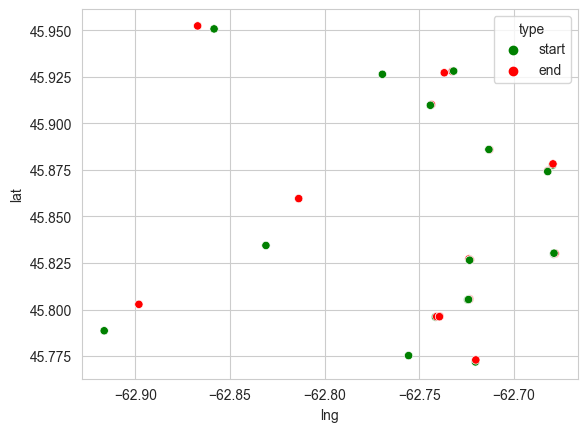

In [320]:
# group 2
y_range = (0, 46.5)
mask = ((locs["lat"] > min(y_range)) & (locs["lat"] < max(y_range)))
locs_group3 = locs[mask]
sns.scatterplot(data=locs_group3, x="lng", y="lat", hue="type", palette=["g", "r"], markers="o")